In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
import numpy as np
import json
import numpy
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c anaconda lxml --yes
#import k-means from clustering stage
from sklearn.cluster import KMeans

import lxml

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    libxslt-1.1.33             |       h7d1a2b0_0         577 KB  anaconda
    lxml-4.5.0                 |   py36hefd8a0e_0         1.6 MB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  libxslt            anaconda/linux-64::libxslt-1.1.33-h7d1a2b0_0
  lxml               anaconda/linux-64::lxml-4.5.0-py36hefd8a0e_0

The following packages wi

ModuleNotFoundError: No module named 'bs4'

In [5]:
!pip install beautifulsoup4
!pip install geopy

     |████████████████████████████████| 122kB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 122kB 18.0MB/s eta 0:00:01


In [8]:
data = pd.read_html('https://housepricehub.com/cities/city/Toronto')


In [9]:
df=pd.DataFrame(data[0])

df.head(15)


,Postal Code,City,Average Price,Average Price Per Frontage Ft,Total listings,Average Price Trend
0,M4W,Toronto,"$6,982,687","$96,153",16,NaN
1,M3B,Toronto,"$5,848,193",NaN,32,NaN
2,M5P,Toronto,"$5,423,904",NaN,22,NaN
3,M2L,Toronto,"$5,208,224",NaN,41,NaN
4,M4V,Toronto,"$4,731,926","$85,711",15,NaN
5,M4N,Toronto,"$4,454,127",NaN,39,NaN
6,M2P,Toronto,"$4,022,700",NaN,24,NaN
7,M4T,Toronto,"$3,681,714",NaN,14,NaN
8,M5R,Toronto,"$3,433,941",NaN,17,NaN
9,M5N,Toronto,"$3,397,549",NaN,16,NaN


In [9]:
df_price=df.drop(['Average Price Per Frontage Ft','Average Price Trend','City'],axis=1)
df_price.head()

,Postal Code,Average Price,Total listings
0,M4W,"$7,055,200",15
1,M3B,"$5,848,193",32
2,M5P,"$5,423,904",22
3,M2L,"$5,234,505",38
4,M4N,"$4,560,656",35


### Retrive Toronto Table

In [10]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
table =pd.read_html(url)[0]

df_tnt=pd.DataFrame(table)

df_tnt.head()



,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [11]:
new_df=df_tnt[df_tnt.Borough!='Not assigned']
new_df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [12]:
new_df=new_df.reset_index()
new_df=new_df.drop(['index'], axis = 1)

In [13]:
new_df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


### Loading Geolocation

In [14]:
postal = pd.read_csv('http://cocl.us/Geospatial_data')
postal.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Merging the two dataframes

In [15]:
toronto_df = pd.merge(df_tnt,df_price, on= 'Postal Code')
toronto_df.head()


,Postal Code,Borough,Neighborhood,Average Price,Total listings
0,M1A,Not assigned,Not assigned,"$2,250,000",1
1,M3A,North York,Parkwoods,"$1,884,272",18
2,M4A,North York,Victoria Village,"$1,199,633",3
3,M5A,Downtown Toronto,"Regent Park, Harbourfront","$2,094,530",13
4,M6A,North York,"Lawrence Manor, Lawrence Heights","$1,770,357",14


### Merging the house price df to the df above

In [16]:
toronto=pd.merge(toronto_df,postal, on='Postal Code')
toronto=toronto.drop(['Total listings'],axis = 1)
toronto.head(15)

,Postal Code,Borough,Neighborhood,Average Price,Latitude,Longitude
0,M3A,North York,Parkwoods,"$1,884,272",43.753259,-79.329656
1,M4A,North York,Victoria Village,"$1,199,633",43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront","$2,094,530",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights","$1,770,357",43.718518,-79.464763
4,M9A,Etobicoke,"Islington Avenue, Humber Valley Village","$3,055,755",43.667856,-79.532242
5,M1B,Scarborough,"Malvern, Rouge","$900,190",43.806686,-79.194353
6,M3B,North York,Don Mills,"$5,848,193",43.745906,-79.352188
7,M4B,East York,"Parkview Hill, Woodbine Gardens","$1,445,184",43.706397,-79.309937
8,M5B,Downtown Toronto,"Garden District, Ryerson","$1,399,000",43.657162,-79.378937
9,M6B,North York,Glencairn,"$1,931,984",43.709577,-79.445073


## Start Loading Map

In [17]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
toronto.sort_values(by='Average Price', ascending=True, inplace=True)

 # get top 15 countries
#top15=toronto['Average Price']
top15 = toronto.tail(15)

top15=toronto.drop(['Postal Code','Borough','Latitude','Longitude'],axis=1)
top15=top15.reset_index(drop=True)
#top15.describe()
top15.head()


top15['Average Price'] = top15['Average Price'].str.replace(',', '')
top15['Average Price'] = top15['Average Price'].str.replace('$', '')
top15['Average Price'] = top15['Average Price'].astype(int)
top15.set_index('Neighborhood', inplace=True)
top15=top15[0:15]

top15.head(20)


,Average Price
Neighborhood,
"Guildwood, Morningside, West Hill",1018192
"Wexford, Maryvale",1019536
"Runnymede, The Junction North",1044231
"Del Ray, Mount Dennis, Keelsdale and Silverthorn",1059235
Downsview,1071222
Scarborough Village,1073198
Weston,1082365
"Northwood Park, York University",1082606
Humber Summit,1112449


ValueError: invalid literal for int() with base 10: 'Average Price'

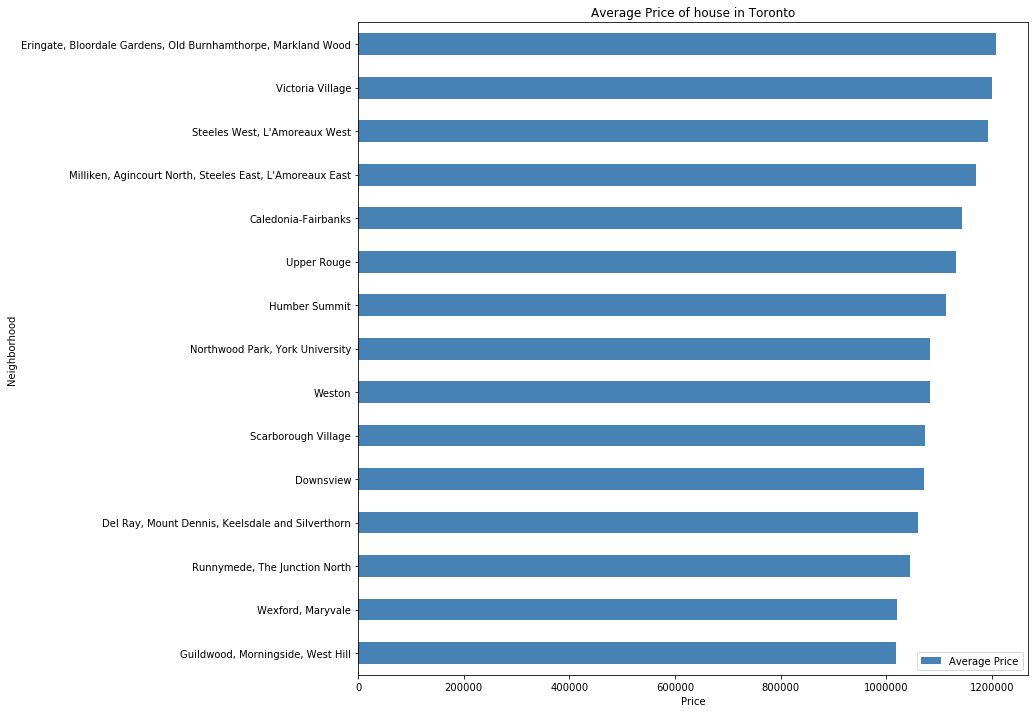

In [18]:
top15=top15.astype({"Average Price":int})

top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Price')
plt.title('Average Price of house in Toronto')
for index, value in enumerate(top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 4700, index - 0.10),color='white')

plt.show()

#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge folium=0.5.0 --yes

In [19]:
from geopy.geocoders import Nominatim
address = 'Toronto, TNT'

geolocator = Nominatim(user_agent="tnt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.7043757, -79.4102558.


In [20]:
import folium
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude','Average Price'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)





map_tnt = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood ,avg_prive in zip(toronto['Latitude'], toronto['Longitude'], toronto['Borough'], toronto['Neighborhood'],toronto['Average Price']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tnt)  
    
map_tnt

### Import Foursquare

In [21]:
CLIENT_ID = 'OHGGX4WFXGH152WCBRALIHSGADARJ5OCGYZ3UVI1WROP5VXO' # your Foursquare ID
CLIENT_SECRET = 'X22O1PLMJIWB1RAZDXSVZSM2HB5XO4CY5O35KWL10E125VOW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OHGGX4WFXGH152WCBRALIHSGADARJ5OCGYZ3UVI1WROP5VXO
CLIENT_SECRET:X22O1PLMJIWB1RAZDXSVZSM2HB5XO4CY5O35KWL10E125VOW


In [22]:
toronto.loc[6, 'Neighborhood']

'Don Mills'

In [23]:
nei_lati=toronto.loc[6, 'Latitude']
nei_longi=toronto.loc[6, 'Longitude']

nei_name=toronto.loc[6, 'Neighborhood']

print('Latitude and longitude values of {} are {}, {}.'.format(nei_name,nei_lati,nei_longi))

Latitude and longitude values of Don Mills are 43.745905799999996, -79.352188.


In [24]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    nei_lati, 
    nei_longi, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=OHGGX4WFXGH152WCBRALIHSGADARJ5OCGYZ3UVI1WROP5VXO&client_secret=X22O1PLMJIWB1RAZDXSVZSM2HB5XO4CY5O35KWL10E125VOW&v=20180605&ll=43.745905799999996,-79.352188&radius=500&limit=100'

In [25]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed8f6fa9388d7001b737446'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Sunnybrook - York Mills',
  'headerFullLocation': 'Sunnybrook - York Mills, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 6,
  'suggestedBounds': {'ne': {'lat': 43.7504058045, 'lng': -79.34597050370319},
   'sw': {'lat': 43.74140579549999, 'lng': -79.35840549629681}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0aed06f964a520202a23e3',
       'name': 'Island Foods',
       'location': {'address': '1310 Don Mills Rd.',
        'lat': 43.745866073988985,
        'lng': -79.34603533317939,
        'labeledLatLngs': [{'label': 'display',
  

In [26]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [27]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,Island Foods,Caribbean Restaurant,43.745866,-79.346035
1,Baretto Caffé,Café,43.744456,-79.346460
2,LA Fitness,Gym / Fitness Center,43.747665,-79.347077
3,Gonoe Sushi,Japanese Restaurant,43.745737,-79.345991
4,Bond Park,Baseball Field,43.745374,-79.351245


#### The above table shows the top ranked places people choose to go

In [28]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


## Exploring nearby venues in Toronto

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
toronto_venues = getNearbyVenues(names=toronto['Neighborhood'],
                                   latitudes=toronto['Latitude'],
                                   longitudes=toronto['Longitude']
                                  )

Guildwood, Morningside, West Hill
Wexford, Maryvale
Runnymede, The Junction North
Del Ray, Mount Dennis, Keelsdale and Silverthorn
Downsview
Scarborough Village
Weston
Northwood Park, York University
Humber Summit
Upper Rouge
Caledonia-Fairbanks
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Victoria Village
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Agincourt
Woodbine Heights
Rouge Hill, Port Union, Highland Creek
Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens
Studio District
Dufferin, Dovercourt Village
Alderwood, Long Branch
New Toronto, Mimico South, Humber Bay Shores
Garden District, Ryerson
East Toronto, Broadview North (Old East York)
Birch Cliff, Cliffside West
India Bazaar, The Beaches West
Parkview Hill, Woodbine Gardens
North Park, Maple Leaf Park, Upwood Park
Downsview
St. James Town, Cabbagetown
Hillcrest Village
Cliffside, Cliffcrest, Scarborough Village West
Fairview, Henry Farm, Oriole
C

In [31]:
print(toronto_venues.shape)
toronto_venues.head()

(1261, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
1,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center


In [32]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Wilson Heights, Downsview North",23,23,23,23,23,23
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Caledonia-Fairbanks,4,4,4,4,4,4


## Analyze each neighborhood

In [33]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()


,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Sake Bar,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [34]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Sake Bar,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000

## Each neighborhood along with the top 5 most common venues

In [35]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Breakfast Spot  0.25
1                     Lounge  0.25
2  Latin American Restaurant  0.25
3               Skating Rink  0.25
4                Yoga Studio  0.00


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place   0.2
1             Pub   0.1
2        Pharmacy   0.1
3  Sandwich Place   0.1
4             Gym   0.1


----Bathurst Manor, Wilson Heights, Downsview North----
         venue  freq
0         Bank  0.09
1  Coffee Shop  0.09
2  Pizza Place  0.04
3    Pet Store  0.04
4     Pharmacy  0.04


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.25
1                 Café  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4          Yoga Studio  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.09
1         Coffee Shop  0.09
2      Sandwich Place  0.09
3          Restaurant  0.09
4     Thai Restaurant  0.04

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(15)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Breakfast Spot,Latin American Restaurant,Lounge,Skating Rink,Discount Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Skating Rink,Dance Studio,Pharmacy,Pool,Pub,Sandwich Place,Gym,American Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Gift Shop,Pharmacy,Bridal Shop,Sandwich Place,Diner,Restaurant,Deli / Bodega,Ice Cream Shop
3,Bayview Village,Café,Japanese Restaurant,Chinese Restaurant,Bank,Women's Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Restaurant,Sandwich Place,Italian Restaurant,Sushi Restaurant,Pharmacy,Pizza Place,Pub,Café,Butcher
5,"Birch Cliff, Cliffside West",College Stadium,Skating Rink,General Entertainment,Café,Dim Sum Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop
6,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Nightclub,Grocery Store,Gym,Convenience Store,Restaurant,Italian Restaurant,Stadium
7,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Bar,Harbor / Marina,Airport,Airport Food Court,Sculpture Garden,Rental Car Location,Boutique
8,Caledonia-Fairbanks,Park,Pool,Women's Store,Greek Restaurant,Department Store,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
9,Cedarbrae,Hakka Restaurant,Gas Station,Bank,Bakery,Fried Chicken Joint,Athletics & Sports,Thai Restaurant,Caribbean Restaurant,Dance Studio,Deli / Bodega


## Clustering of Neighborhoods

In [39]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int32)

## Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood¶

In [45]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_df

# merge toronto_grouped with toronto_df to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#toronto_merged=toronto_merged[toronto_merged.Borough!='Not assigned']
toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Average Price,Total listings,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1A,Not assigned,Not assigned,"$2,250,000",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M3A,North York,Parkwoods,"$1,884,272",18,0.0,Park,Convenience Store,Food & Drink Shop,Bus Stop,Diner,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore
2,M4A,North York,Victoria Village,"$1,199,633",3,1.0,Hockey Arena,Intersection,Pizza Place,Coffee Shop,Portuguese Restaurant,Women's Store,Discount Store,Distribution Center,Dog Run,Doner Restaurant
3,M5A,Downtown Toronto,"Regent Park, Harbourfront","$2,094,530",13,1.0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Cosmetics Shop,Shoe Store,Restaurant
4,M6A,North York,"Lawrence Manor, Lawrence Heights","$1,770,357",14,1.0,Clothing Store,Accessories Store,Furniture / Home Store,Sporting Goods Shop,Event Space,Vietnamese Restaurant,Boutique,Miscellaneous Shop,Coffee Shop,Donut Shop


In [53]:
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged = toronto_merged.astype({"Cluster Labels": int})
#toronto.sort_values(by='Average Price', ascending=True, inplace=True)
toronto_merged=toronto_merged.sort_values(by='Average Price',ascending=False)
toronto_merged.head(15)

,Postal Code,Borough,Neighborhood,Average Price,Total listings,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
92,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North","$3,026,362",8,0,Pool,Park,River,Women's Store,Dessert Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop
94,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...","$1,917,718",11,1,Construction & Landscaping,Baseball Field,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore
95,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...","$1,783,599",16,1,Gym,Supplement Shop,Grocery Store,Discount Store,Sandwich Place,Burrito Place,Burger Joint,Fast Food Restaurant,Social Club,Bakery
93,M4Y,Downtown Toronto,Church and Wellesley,"$1,604,950",2,1,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Yoga Studio,Bubble Tea Shop,Burger Joint,Mediterranean Restaurant,Pub
91,M4X,Downtown Toronto,"St. James Town, Cabbagetown","$1,498,500",2,1,Coffee Shop,Italian Restaurant,Pub,Bakery,Restaurant,Pizza Place,Café,Indian Restaurant,Snack Place,Bookstore


## Visualizing the clustered neighborhood




In [54]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

KeyError: 'Latitude'